In [1]:
import pandas as pd
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
happiness_df = pd.read_csv("Final_dataset.csv")
happiness_df.head()

,Unnamed: 0,Country,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual,Year
0,0,Afghanistan,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190,1.952100,2015
1,1,Afghanistan,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120,2.145580,2016
2,2,Afghanistan,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158,2.150801,2017
3,3,Afghanistan,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000,2.196000,2018
4,4,Afghanistan,3.203,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000,1.792000,2019


In [3]:
covid_df = pd.read_csv("covid_data.csv")
covid_df.head()

,Country,Happiness Score 2019,Happiness Score 2020,Percent Change,Average Cases in 2020
0,Afghanistan,3.203,2.5669,-19.859506,27197.25000
1,Albania,4.719,4.8827,3.468955,12508.53691
2,Algeria,5.211,5.0051,-3.951261,34030.14469
3,Argentina,6.086,5.9747,-1.828788,487948.75330
4,Armenia,4.559,4.6768,2.583895,47559.07516


In [4]:
#checking number of countries in covid dataframe
covid_df["Country"].value_counts

<bound method IndexOpsMixin.value_counts of 0      Afghanistan
1          Albania
2          Algeria
3        Argentina
4          Armenia
          ...     
135      Venezuela
136        Vietnam
137          Yemen
138         Zambia
139       Zimbabwe
Name: Country, Length: 140, dtype: object>

In [5]:
#create a dataframe with just the 2020 data
happiness_2020 = happiness_df.loc[happiness_df["Year"] == 2020]
happiness_2020.head()

,Unnamed: 0,Country,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual,Year
5,5,Afghanistan,2.5669,0.300706,0.470367,52.590000,0.396573,0.135235,0.933687,1.507236,2020
11,11,Albania,4.8827,0.906653,0.671070,68.708138,0.781994,0.171028,0.896304,1.640897,2020
17,17,Algeria,5.0051,0.943856,0.803385,65.905174,0.466611,0.118915,0.735485,1.840812,2020
27,27,Argentina,5.9747,1.028466,0.900568,68.803802,0.831132,0.070100,0.842010,2.072541,2020
33,33,Armenia,4.6768,0.808262,0.757479,66.750656,0.712018,0.107226,0.773545,1.468162,2020


In [6]:
#checking number of countries in happiness 2020 dataframe
happiness_2020["Country"].value_counts

<bound method IndexOpsMixin.value_counts of 5      Afghanistan
11         Albania
17         Algeria
27       Argentina
33         Armenia
          ...     
910      Venezuela
916        Vietnam
922          Yemen
928         Zambia
934       Zimbabwe
Name: Country, Length: 153, dtype: object>

In [7]:
#Merge the happiness_2020 and covid_df dataframes to keep data for countries only present in both dataframes
#covid_df = covid_df.rename(columns = {'Country':'country'})

In [8]:
merged_df = happiness_2020.merge(covid_df, on = 'Country' , how = 'left')
merged_df.head()

,Unnamed: 0,Country,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual,Year,Happiness Score 2019,Happiness Score 2020,Percent Change,Average Cases in 2020
0,5,Afghanistan,2.5669,0.300706,0.470367,52.590000,0.396573,0.135235,0.933687,1.507236,2020,3.203,2.5669,-19.859506,27197.25000
1,11,Albania,4.8827,0.906653,0.671070,68.708138,0.781994,0.171028,0.896304,1.640897,2020,4.719,4.8827,3.468955,12508.53691
2,17,Algeria,5.0051,0.943856,0.803385,65.905174,0.466611,0.118915,0.735485,1.840812,2020,5.211,5.0051,-3.951261,34030.14469
3,27,Argentina,5.9747,1.028466,0.900568,68.803802,0.831132,0.070100,0.842010,2.072541,2020,6.086,5.9747,-1.828788,487948.75330
4,33,Armenia,4.6768,0.808262,0.757479,66.750656,0.712018,0.107226,0.773545,1.468162,2020,4.559,4.6768,2.583895,47559.07516


In [9]:
#drop null values from merged dataframe

merged_df = merged_df.dropna(subset = ["Percent Change","Average Cases in 2020"])

In [10]:
x = merged_df["Average Cases in 2020"].tolist()
y = merged_df["Percent Change"].tolist()

print(x)
print(y)

[27197.25, 12508.536909999999, 34030.14469, 487948.7533, 47559.07516, 14930.27566, 71216.76527, 42317.09804, 41441.36538, 230132.0334, 66334.27922000001, 162144.6777, 1588.09622, 76447.62162, 26654.43046, 3371.66787, 2873792.145, 37109.88963, 1637.2289560000002, 358.0181159, 186.45294119999997, 14059.60465, 142256.0968, 3270.373288, 964.9409722000001, 295359.262, 79551.18841, 516088.4917, 395.5081301, 48203.84053, 31903.453380000003, 3376.567114, 30138.385110000003, 69172.30392, 92305.84967000001, 65246.82919, 18791.46875, 4394.417476, 43648.58163, 9532.624259999999, 609229.93, 5838.604096, 1744.7517239999997, 29911.67097, 345007.8794, 29590.29693, 25733.74194, 56344.989760000004, 7294.309523999999, 5909.376307, 48689.472969999995, 51356.82178, 2622.915584, 3217448.777, 198602.37699999998, 371942.6215, 207111.4712, 34087.254069999995, 131818.8762, 450299.87799999997, 3885.341216, 53552.25217, 46351.710530000004, 87447.32992999999, 30222.775510000003, 13341.43345, 66794.6891, 32448.1972

In [11]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x,y)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.0x + 1.3
The p-value is: 0.103


In [14]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(ys * slope + intercept) for ys in y]

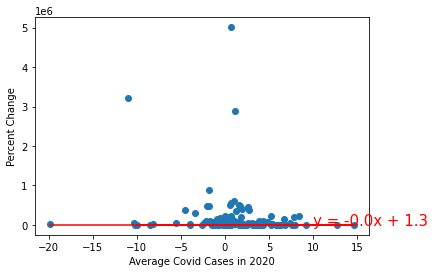

In [18]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(y,x)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(y,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Average Covid Cases in 2020')
plt.ylabel('Percent Change in Happiness from 2019-2020')
plt.show()